In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import random

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
1,2600,4,120.0
19,800,1,32.0
9,3700,5,167.0
4,1200,2,51.0
16,1180,3,48.0


In [3]:
df.describe()

,area,bedrooms,price
count,20.000000,20.000000,20.000000
mean,1821.450000,2.900000,78.853500
std,864.615794,0.967906,43.761901
min,800.000000,1.000000,32.000000
25%,1173.750000,2.000000,41.500000
50%,1480.500000,3.000000,61.000000
75%,2633.000000,3.250000,106.500000
max,3700.000000,5.000000,167.000000


In [4]:
df.shape

(20, 3)

In [5]:
X = df.drop('price', axis=1).values
Y = df.price.values.reshape(df.shape[0],1)  # ma trận (20x1)
X.shape, Y.shape

((20, 2), (20, 1))

In [6]:
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_scaled = scalerX.fit_transform(X)
Y_scaled = scalerY.fit_transform(Y)

In [7]:
random_index = random.randint(0, df.shape[0]-1)
randX= X_scaled[random_index].reshape(1,-1)
randY = Y_scaled[random_index].reshape(1,-1)
randX, randY

(array([[0.13103448, 0.5       ]]), array([[0.11851852]]))

# Stochastic Gradien Descent

In [8]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    features = X.shape[1]  # 2
    samples = X.shape[0]  # 20
    
    w = np.ones(shape=(features, 1))  # matrix (2x1)
    bias = 0
    
    list_loss = []
    list_epoch = []
    
    for i in range(epochs):
        rand_idx = random.randint(0, samples-1)  # take a random sample 
        rand_X = X[rand_idx].reshape(1,-1)  # matrix (1x2)
        rand_Y = y_true[rand_idx].reshape(1,-1)  # matrix (1x1)
        
        weighted_sum = (rand_X @ w) + bias  # (1x2) @ (2x1) + 1 số = (1x1)
        rand_Y_pred = weighted_sum
        
        loss = np.mean(np.square(rand_Y - rand_Y_pred))
        
        if i % 5 == 0:
            list_loss.append(loss)
            list_epoch.append(i)
        
        d_w = -(2/1) * (rand_X.T @ (rand_Y - rand_Y_pred))  # 1 số * (2x1) @ (1x1) = (2x1)
        d_bias = -(2/1) * np.sum(rand_Y - rand_Y_pred)
        
        w = w - learning_rate * d_w  # returns matrix (2x1)
        bias = bias - learning_rate * d_bias
    
    return w, bias, loss, list_loss, list_epoch

In [9]:
w, bias, loss, list_loss, list_epoch = stochastic_gradient_descent(X_scaled, Y_scaled, 3000)
loss

0.01041180705122151

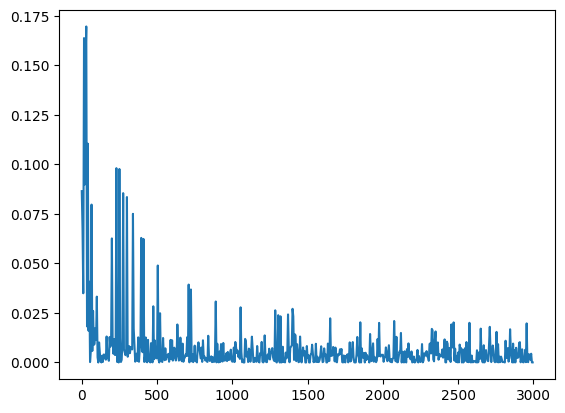

In [10]:
plt.plot(list_epoch, list_loss)

### Predict

In [11]:
w, bias

(array([[0.70092641],
        [0.48679333]]),
 -0.13390551089953928)

In [12]:
def predict(X, w, bias):
    weighted_sum = X @ w + bias
    y_pred = weighted_sum
    return y_pred

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, train_size=0.7, random_state=1)

In [14]:
yp_test = predict(X_test, w, bias)

In [15]:
scalerY.inverse_transform(yp_test)

array([[ 70.30705492],
       [ 59.18045245],
       [126.25045186],
       [ 79.41063875],
       [ 67.66407896],
       [ 94.09383849]])

In [16]:
scalerY.inverse_transform(y_test)

array([[ 75.],
       [ 48.],
       [135.],
       [ 82.],
       [ 62.],
       [101.]])